In [30]:
# Data analysis of the day vs tip count 

import pandas as pd
import os 
import numpy as np
import matplotlib as m
import matplotlib.pyplot as plt
from tqdm import tqdm

In [35]:
# path handelling 
os.chdir(r"D:\University files\2020-2021\1b\Machine Learning\Project\Uber-data-analysis")
data = os.listdir('Uber-dataset')
data_new = []
for d in data:
	tmp = d.split('.')
	if tmp[-1] == 'csv':
		data_new.append(d)
month = [d.split("-")[-1].split(".")[0] for d in data_new]
print(data_new)

['uber-raw-data-apr14.csv', 'uber-raw-data-aug14.csv', 'uber-raw-data-jul14.csv', 'uber-raw-data-jun14.csv', 'uber-raw-data-may14.csv', 'uber-raw-data-sep14.csv']


In [40]:
trips = []
unique_day = []
for d in tqdm(data_new):
    trip_count = 0
    os.chdir(r"D:\University files\2020-2021\1b\Machine Learning\Project\Uber-data-analysis\Uber-dataset")
    os.chdir(d)
    data = pd.read_csv(d)
    date_year = data['Date/Time']
    day = data.apply(lambda x: int(x['Date/Time'].split(' ')[0].split('/')[1]),axis=1)
    unique_day.append(np.sort(np.unique(day)))
    df = pd.DataFrame({'day':day})
    trip_counts = df['day'].value_counts()
    trips.append(trip_counts)
    #print(unique_day)
    #print(trip_counts)

100%|██████████████████████████████████████████| 6/6 [00:58<00:00,  9.68s/it]


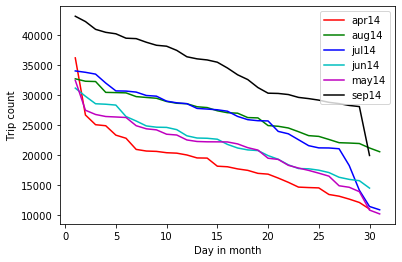

In [41]:
# plot the data
color = ['r','g','b','c','m','k']

for trip in range(len(trips)):
    plt.plot(unique_day[trip],trips[trip],color=color[trip])
    
plt.legend(month)
plt.xlabel('Day in month')
plt.ylabel('Trip count')
plt.show()